<a href="https://colab.research.google.com/github/prant1719/BADS7105-CRM/blob/main/HW7_Product_Recommendation/HW7_Product_Rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Product Recommendation

### Student : Prant Yodrabum 6310412010

In [1]:
pip install mlxtend 

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CUS')
df.head()

,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,10/28/2021 14:05:59,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,10/28/2021 14:06:18,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,10/28/2021 14:06:20,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/28/2021 14:06:21,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,10/28/2021 14:06:23,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


# Cleaning Data Set

In [ ]:
# remove first 2 rows, drop timestamp
new = df.iloc[2:,1:].reset_index(drop=True).rename_axis('No_stu').copy()
new.head()

,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,...,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
No_stu,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,...,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,...,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,...,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
4,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,...,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [ ]:
new.drop('เครื่องซักผ้า',axis='columns', inplace=True)
new.drop('NONE',axis='columns', inplace=True)

In [ ]:
new.fillna(0, inplace=True)
new.replace({'เคยซื้อ': 1,'เคย' : 1, 'ไม่เคยซื้อ': 0,'ไม่เคย': 0}, inplace=True)


# EDA

In [ ]:
new.describe()

,โปรแกรมแท้,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,...,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.407407,0.962963,0.333333,0.925926,0.222222,0.444444,0.148148,0.074074,0.888889,0.037037,...,0.111111,0.333333,0.629630,0.444444,0.148148,0.555556,0.185185,0.222222,0.037037,0.222222
std,0.500712,0.192450,0.480384,0.266880,0.423659,0.506370,0.362014,0.266880,0.320256,0.192450,...,0.320256,0.480384,0.492103,0.506370,0.362014,0.506370,0.395847,0.423659,0.192450,0.423659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


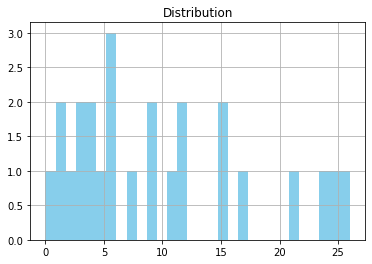

In [ ]:
new.sum().hist(bins=30, color='skyblue')
plt.title('Distribution')
plt.show()

In [ ]:
grouped = new.groupby('No_stu')
grouped.head()

,โปรแกรมแท้,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,...,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
No_stu,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,0,1,0,1,0,1,0,1,1,0,...,0,1,1,1,0,1,0,0,0,0
2,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,1,0,1,0,1,0,1
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
6,0,1,1,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
7,0,1,0,1,1,1,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
8,0,1,0,1,0,0,0,0,1,0,...,0,0,1,1,0,1,0,1,0,0


# Recommendation System

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(new, min_support=0.3, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, min_threshold=0.35)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(โปรแกรมแท้),(รองเท้าวิ่ง),0.407407,0.962963,0.370370,0.909091,0.944056,-0.021948,0.407407
1,(รองเท้าวิ่ง),(โปรแกรมแท้),0.962963,0.407407,0.370370,0.384615,0.944056,-0.021948,0.962963
2,(โปรแกรมแท้),(คอร์สเรียนเสริม),0.407407,0.925926,0.407407,1.000000,1.080000,0.030178,inf
3,(คอร์สเรียนเสริม),(โปรแกรมแท้),0.925926,0.407407,0.407407,0.440000,1.080000,0.030178,1.058201
4,(โปรแกรมแท้),(เคส ipad),0.407407,0.888889,0.370370,0.909091,1.022727,0.008230,1.222222
5,(เคส ipad),(โปรแกรมแท้),0.888889,0.407407,0.370370,0.416667,1.022727,0.008230,1.015873
6,(ผักกรอบ),(รองเท้าวิ่ง),0.333333,0.962963,0.333333,1.000000,1.038462,0.012346,inf
7,(คอร์สเรียนเสริม),(รองเท้าวิ่ง),0.925926,0.962963,0.888889,0.960000,0.996923,-0.002743,0.925926
8,(รองเท้าวิ่ง),(คอร์สเรียนเสริม),0.962963,0.925926,0.888889,0.923077,0.996923,-0.002743,0.962963
9,(BTC (Bitcoin)),(รองเท้าวิ่ง),0.444444,0.962963,0.444444,1.000000,1.038462,0.016461,inf


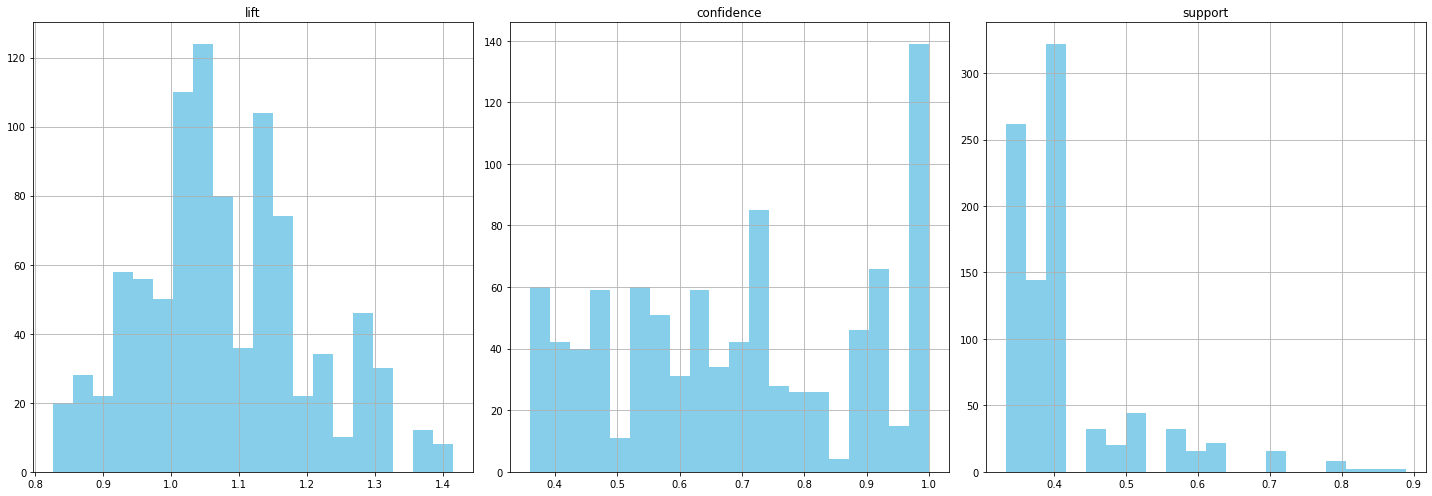

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,7), tight_layout=True)
for var, ax in zip(['lift','confidence','support'], axes):
    rules[var].hist(bins=20, ax=ax, color='skyblue')
    ax.set_title(var)
plt.show()

# Final Rules

In [ ]:
final=rules[(rules['antecedents'].apply(len) == 1) &
    (rules['consequents'].apply(len) == 1) &
    (rules['lift'] >= 1) &
    (rules['support'] >= 0.6) &
    (rules['confidence'] >= 0.7)]

In [ ]:
final.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.777778,0.962963,0.777778,1.000000,1.038462,0.028807,inf
14,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.962963,0.777778,0.777778,0.807692,1.038462,0.028807,1.155556
17,(Ebook),(รองเท้าวิ่ง),0.629630,0.962963,0.629630,1.000000,1.038462,0.023320,inf
47,"(หูฟัง bluetooth (airpods,truewireless))",(เคส ipad),0.777778,0.888889,0.703704,0.904762,1.017857,0.012346,1.166667
48,(เคส ipad),"(หูฟัง bluetooth (airpods,truewireless))",0.888889,0.777778,0.703704,0.791667,1.017857,0.012346,1.066667


In [ ]:
final2 = rules[(rules['antecedents'].apply(len) == 2) & (rules['consequents'].apply(len) == 1) & (rules['lift'] >= 1) & (rules['support'] >= 0.6) & (rules['confidence'] >= 0.7)].sort_values('lift', ascending=False)
final2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,"(รองเท้าวิ่ง, เคส ipad)","(หูฟัง bluetooth (airpods,truewireless))",0.851852,0.777778,0.703704,0.826087,1.062112,0.041152,1.277778
107,"(คอร์สเรียนเสริม, หูฟัง bluetooth (airpods,tru...",(รองเท้าวิ่ง),0.703704,0.962963,0.703704,1.000000,1.038462,0.026063,inf
155,"(หูฟัง bluetooth (airpods,truewireless), เคส i...",(รองเท้าวิ่ง),0.703704,0.962963,0.703704,1.000000,1.038462,0.026063,inf
109,"(คอร์สเรียนเสริม, รองเท้าวิ่ง)","(หูฟัง bluetooth (airpods,truewireless))",0.888889,0.777778,0.703704,0.791667,1.017857,0.012346,1.066667
154,"(หูฟัง bluetooth (airpods,truewireless), รองเท...",(เคส ipad),0.777778,0.888889,0.703704,0.904762,1.017857,0.012346,1.166667
236,"(คอร์สเรียนเสริม, หูฟัง bluetooth (airpods,tru...",(เคส ipad),0.703704,0.888889,0.629630,0.894737,1.006579,0.004115,1.055556


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3641 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current

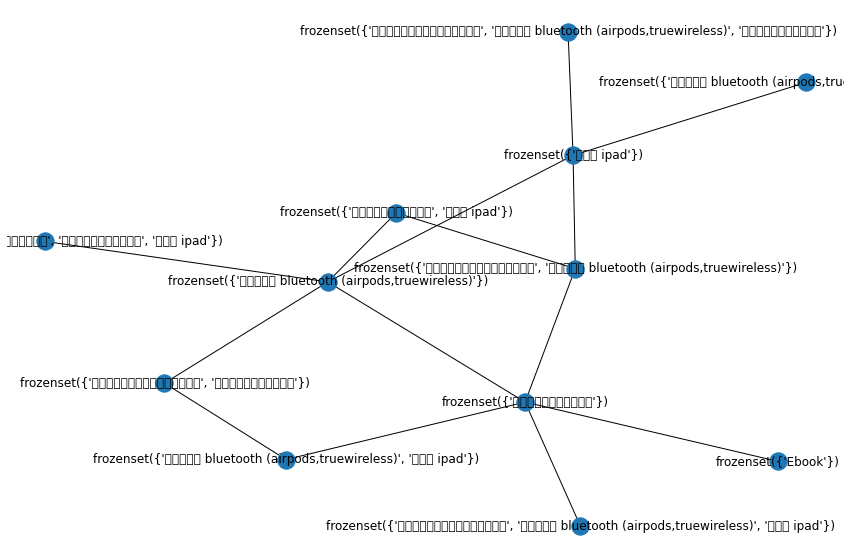

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(15,10))
GA=nx.from_pandas_edgelist(final,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

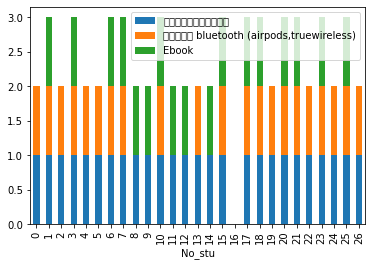

In [ ]:
axis = new[["รองเท้าวิ่ง", "หูฟัง bluetooth (airpods,truewireless)",'Ebook']].plot(kind="bar", stacked=True)
fig = axis.get_figure()

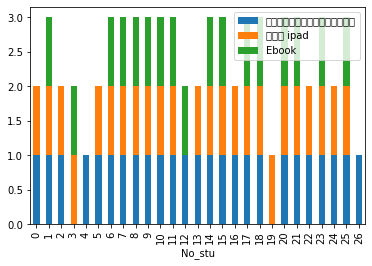

In [ ]:
axis = new[["คอร์สเรียนเสริม", "เคส ipad",'Ebook']].plot(kind="bar", stacked=True)
fig = axis.get_figure()

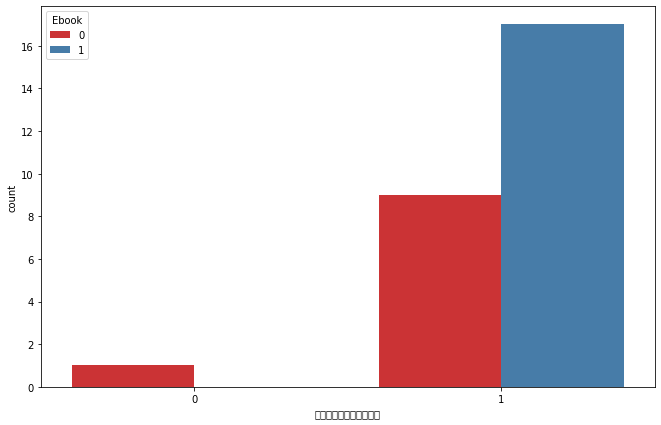

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(11,7))
sns.countplot(x='รองเท้าวิ่ง',hue='Ebook',data=new,palette='Set1')

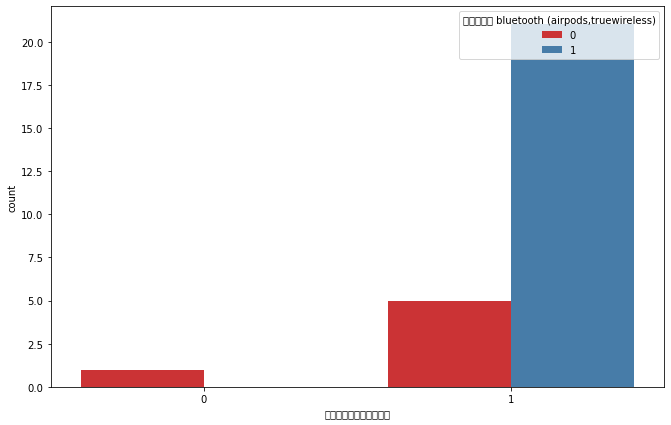

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='รองเท้าวิ่ง',hue='หูฟัง bluetooth (airpods,truewireless)',data=new,palette='Set1')

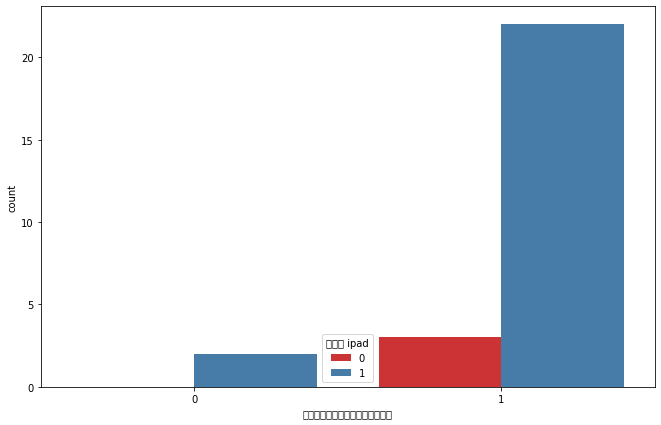

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='คอร์สเรียนเสริม',hue='เคส ipad',data=new,palette='Set1')

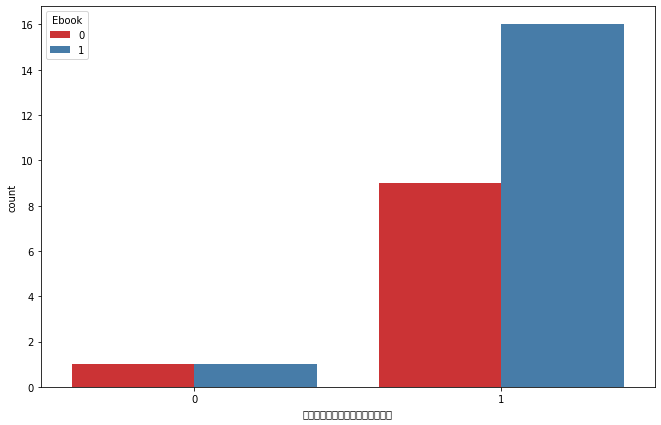

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='คอร์สเรียนเสริม',hue='Ebook',data=new,palette='Set1')

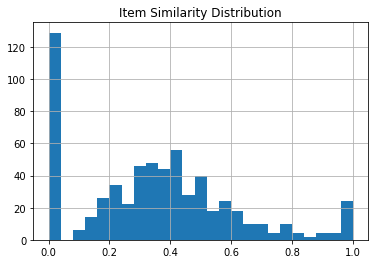

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
X = new.T
item_names = new.columns
sim = cosine_similarity(X)
sim = pd.DataFrame(sim, index=item_names, columns=item_names)
sim = sim.unstack().reset_index()
sim.columns = ['A','B','sim']
sim['sim'].hist(bins=25)
plt.title('Item Similarity Distribution');

In [ ]:
item_names

Index(['โปรแกรมแท้', 'รองเท้าวิ่ง', 'ผักกรอบ', 'คอร์สเรียนเสริม',
       'nintendo switch', 'BTC (Bitcoin)', 'mechanical keyboard',
       'เครื่องดูดฝุ่น Dyson', 'เคส ipad', 'คุณเคยซื้อโต๊ะปรับระดับหรือไม่',
       'สินค้าจากพิมรี่พาย', 'I PHONE 13',
       'หูฟัง bluetooth (airpods,truewireless)', 'แก้วน้ำ Starbucks',
       'เบาะรองนั่ง', 'เครื่องชงกาแฟแคปซูล', 'ตั๋วเครื่องบินไปญี่ปุ่น',
       'Ebook', 'ตู้เย็น', 'กล้องฟิล์ม', 'เครื่องดนตรี', 'whey protein',
       'วัตถุมงคล ', 'กระบองเพชรพูดได้', 'ROV Skin'],
      dtype='object')

In [ ]:
X.head()

No_stu,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
โปรแกรมแท้,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,1,1,1,1
รองเท้าวิ่ง,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ผักกรอบ,0,0,1,0,1,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,1
คอร์สเรียนเสริม,1,1,1,0,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
nintendo switch,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
sim

,A,B,sim
0,โปรแกรมแท้,โปรแกรมแท้,1.000000
1,โปรแกรมแท้,รองเท้าวิ่ง,0.591312
2,โปรแกรมแท้,ผักกรอบ,0.402015
3,โปรแกรมแท้,คอร์สเรียนเสริม,0.663325
4,โปรแกรมแท้,nintendo switch,0.369274
...,...,...,...
620,ROV Skin,เครื่องดนตรี,0.421637
621,ROV Skin,whey protein,0.365148
622,ROV Skin,วัตถุมงคล,0.333333
623,ROV Skin,กระบองเพชรพูดได้,0.408248


In [ ]:
sim_threshold = 0.65
sim_df = sim[sim.apply(lambda x: x['item1']!=x['item2'], axis=1) & sim['sim'].between(sim_threshold, 1)]
sim_df.sort_values('sim', ascending=False)

,item1,item2,sim
76,คอร์สเรียนเสริม,รองเท้าวิ่ง,0.941357
28,รองเท้าวิ่ง,คอร์สเรียนเสริม,0.941357
201,เคส ipad,รองเท้าวิ่ง,0.920737
33,รองเท้าวิ่ง,เคส ipad,0.920737
37,รองเท้าวิ่ง,"หูฟัง bluetooth (airpods,truewireless)",0.898717
301,"หูฟัง bluetooth (airpods,truewireless)",รองเท้าวิ่ง,0.898717
83,คอร์สเรียนเสริม,เคส ipad,0.898146
203,เคส ipad,คอร์สเรียนเสริม,0.898146
212,เคส ipad,"หูฟัง bluetooth (airpods,truewireless)",0.846327
308,"หูฟัง bluetooth (airpods,truewireless)",เคส ipad,0.846327


# Product Recomendation 


*   ถ้าซื้อรองเท้าวิ่งแล้ว ควรแนะนำ หูฟัง Bluetooth และ Ebook ให้ลูกค้า
*   ถ้าซื้อคอสเรียนเสริมแล้ว ควรแนะนำ เคส Ipaad และ Ebook ให้ลูกค้า

